# Лабораторная работа: Метод Ферма + Cython + многопоточность

In [9]:
pip install --upgrade pip

Note: you may need to restart the kernel to use updated packages.


## Шаг 1. Обычная реализация на Python

In [10]:
import math

def is_perfect_square(n):
    root = int(math.isqrt(n))
    return root * root == n

def fermat_factorization(N):
    if N % 2 == 0:
        return 2, N // 2
    x = math.isqrt(N) + 1
    while True:
        y_squared = x * x - N
        if is_perfect_square(y_squared):
            y = int(math.isqrt(y_squared))
            return (x - y, x + y)
        x += 1


## Шаг 2. Измерение времени выполнения Python-версии

In [11]:
import timeit

TEST_LST = [101, 9973, 104729, 101909, 609133, 1300039, 9999991, 99999959, 99999971, 3000009, 700000133]

time_res = timeit.repeat(
    "res = [fermat_factorization(i) for i in TEST_LST]",
    setup="from __main__ import fermat_factorization, TEST_LST",
    number=1,
    repeat=1
)
print(f"Python baseline: {time_res[0]:.2f} секунд")


Python baseline: 25.37 секунд


## Шаг 3. Измерение времени выполнения Python-версии

In [17]:
from ferma_fact_cy import fermat_factorization_cy

In [21]:
import timeit

TEST_LST = [101, 9973, 104729, 101909, 609133, 1300039, 9999991, 99999959, 99999971, 3000009, 700000133]

time_res_cy = timeit.repeat(
    "res = [fermat_factorization_cy(i) for i in TEST_LST]",
    setup="from ferma_fact_cy import fermat_factorization_cy; from __main__ import TEST_LST",
    number=1,
    repeat=1
)
print(f"Cython время: {time_res_cy[0]:.4f} секунд")


Cython время: 0.0134 секунд
Python baseline: 25.37 секунд


## Шаг 4. Сравнение времени выполнения Python vs Cython

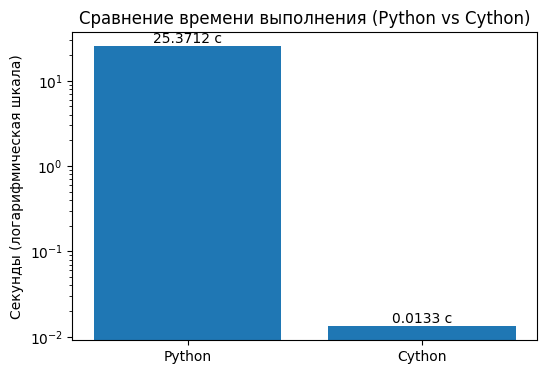

In [19]:
import matplotlib.pyplot as plt

labels = ['Python', 'Cython']
times = [time_res[0], time_res_cy[0] if time_res_cy[0] > 0 else 1e-4]  # защита от нуля

plt.figure(figsize=(6, 4))
plt.bar(labels, times)
plt.yscale("log")  # логарифмическая шкала по оси Y
plt.ylabel("Секунды (логарифмическая шкала)")
plt.title("Сравнение времени выполнения (Python vs Cython)")
for i, v in enumerate(times):
    plt.text(i, v, f"{v:.4f} с", ha='center', va='bottom')
plt.show()
